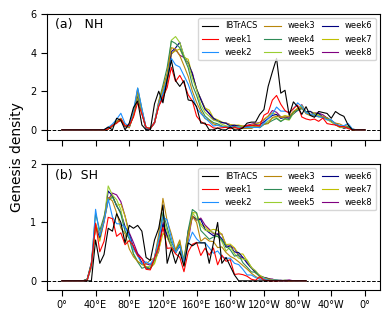

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

file_path = 'Data_TC/Proc/obs_and_model_lon_lat.csv'  

longitude = data['Longitude']
ibtracs_n = data['IBTrACS_N']
ibtracs_s = data['IBTrACS_S']

week1_n = data['week1_N']
week2_n = data['week2_N']
week3_n = data['week3_N']
week4_n = data['week4_N']
week5_n = data['week5_N']
week6_n = data['week6_N']
week7_n = data['week7_N']
week8_n = data['week8_N']

week1_s = data['week1_S']
week2_s = data['week2_S']
week3_s = data['week3_S']
week4_s = data['week4_S']
week5_s = data['week5_S']
week6_s = data['week6_S']
week7_s = data['week7_S']
week8_s = data['week8_S']


def get_longitude_label(lon):
    if lon == 0:
        return "0°"
    if lon == 360:
        return "0°"
    elif lon > 180:
        return f"{360 - lon}°W"
    else:
        return f"{lon}°E"


longitude_labels = [get_longitude_label(lon) for lon in longitude]


fig, axs = plt.subplots(2, 1, figsize=(3.8, 3.3), sharex=True)
axs[0].axhline(0, color='k', alpha=1, linewidth=0.7, linestyle='--')
axs[1].axhline(0, color='k', alpha=1, linewidth=0.7, linestyle='--')

lines_n = []
lines_n.append(axs[0].plot(longitude, week8_n, label='week8', color='purple', linewidth=0.8)[0])
lines_n.append(axs[0].plot(longitude, week7_n, label='week7', color='y', linewidth=0.8)[0])
lines_n.append(axs[0].plot(longitude, week6_n, label='week6', color='navy', linewidth=0.8)[0])
lines_n.append(axs[0].plot(longitude, week5_n, label='week5', color='yellowgreen', linewidth=0.8)[0])
lines_n.append(axs[0].plot(longitude, week4_n, label='week4', color='seagreen', linewidth=0.8)[0])
lines_n.append(axs[0].plot(longitude, week3_n, label='week3', color='darkgoldenrod', linewidth=0.8)[0])
lines_n.append(axs[0].plot(longitude, week2_n, label='week2', color='dodgerblue', linewidth=0.8)[0])
lines_n.append(axs[0].plot(longitude, week1_n, label='week1', color='red', linewidth=0.8)[0])
lines_n.append(axs[0].plot(longitude, ibtracs_n, label='IBTrACS', color='k', linewidth=0.8)[0])


lines_n.reverse()
axs[0].legend(lines_n, [line.get_label() for line in lines_n], loc='upper right', ncol=3, fontsize=6, columnspacing=0.8)
axs[0].set_ylim(-0.5, 6)
axs[0].set_yticks([0, 2, 4, 6])  

lines_s = []

filtered_longitude = longitude[longitude <= 290]
week8_s_filtered = week8_s[longitude <= 290]
week7_s_filtered = week7_s[longitude <= 290]
week6_s_filtered = week6_s[longitude <= 290]
week5_s_filtered = week5_s[longitude <= 290]
week4_s_filtered = week4_s[longitude <= 290]
week3_s_filtered = week3_s[longitude <= 290]
week2_s_filtered = week2_s[longitude <= 290]
week1_s_filtered = week1_s[longitude <= 290]
ibtracs_s_filtered = ibtracs_s[longitude <= 290]

lines_s.append(axs[1].plot(filtered_longitude, week8_s_filtered, label='week8', color='purple', linewidth=0.8)[0])
lines_s.append(axs[1].plot(filtered_longitude, week7_s_filtered, label='week7', color='y', linewidth=0.8)[0])
lines_s.append(axs[1].plot(filtered_longitude, week6_s_filtered, label='week6', color='navy', linewidth=0.8)[0])
lines_s.append(axs[1].plot(filtered_longitude, week5_s_filtered, label='week5', color='yellowgreen', linewidth=0.8)[0])
lines_s.append(axs[1].plot(filtered_longitude, week4_s_filtered, label='week4', color='seagreen', linewidth=0.8)[0])
lines_s.append(axs[1].plot(filtered_longitude, week3_s_filtered, label='week3', color='darkgoldenrod', linewidth=0.8)[0])
lines_s.append(axs[1].plot(filtered_longitude, week2_s_filtered, label='week2', color='dodgerblue', linewidth=0.8)[0])
lines_s.append(axs[1].plot(filtered_longitude, week1_s_filtered, label='week1', color='red', linewidth=0.8)[0])
lines_s.append(axs[1].plot(filtered_longitude, ibtracs_s_filtered, label='IBTrACS', color='k', linewidth=0.8)[0])


lines_s.reverse()
axs[1].legend(lines_s, [line.get_label() for line in lines_s], loc='upper right', ncol=3, fontsize=6, columnspacing=0.8)
axs[1].set_ylim(-0.15, 2)


for ax in axs.flat:
    for _, spine in ax.spines.items():
        spine.set_linewidth(0.8)

fig.text(0.005, 0.51, 'Genesis density', ha='center', va='center', rotation='vertical', fontsize=10)

tick_interval = 8
axs[1].set_xticks(longitude[::tick_interval])
axs[1].set_xticklabels(longitude_labels[::tick_interval])

axs[0].xaxis.set_major_locator(MultipleLocator(40))
axs[0].yaxis.set_major_locator(MultipleLocator(2))

# Set major ticks locator for the second subplot
axs[1].xaxis.set_major_locator(MultipleLocator(40))
axs[1].yaxis.set_major_locator(MultipleLocator(1))


for ax in axs:
    ax.tick_params(which='major', length=4, color='k')
    ax.tick_params(axis='both', which='major', labelsize=7)
    
axs[0].text(-8, 5.25, '(a)   NH', fontsize=9)
axs[1].text(-8, 1.75, '(b)  SH', fontsize=9)

plt.tight_layout()
#plt.savefig('Figures/Figure5_Latitudinal_Sum_of_Genesis_Density.png', dpi=400, bbox_inches='tight')
plt.show()
